# Pymaceuticals Inc.
---

### Analysis

The primary objective of this report is to assess the comparative effectiveness of Capomulin treatment in relation to other treatment methods. A 45-day observation of squamous cell carcinoma (SCC) skin cancer was conducted on 249 lab mice to gain insights into the effectiveness of Capomulin through data analysis.

The key findings of this analysis are as follows:

1.	Data Preparation: The initial step involved data cleaning to ensure data accuracy. Duplicate records associated with mouse ID 'g989' were identified and removed to maintain data integrity, resulting in a dataset of 248 unique subjects for further analysis.

2.	Statistical Analysis: Statistical methods were applied to calculate various metrics, including averages, medians, measures of data spread, and more. These calculations provided a comprehensive understanding of how tumor sizes evolved during treatment for the remaining 248 mice, offering valuable insights into treatment outcomes.

3.	Data Visualization: To enhance the interpretability of the results, bar charts were employed to visualize the distribution of observations across different treatments, while pie charts were used to depict the gender distribution among the study's mice.

4.	Identifying Outliers: Potential outliers were identified among mice treated with four promising regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) by examining quartiles and interquartile ranges.

5.	Box Plots: Box plots were employed as a visual representation of data distribution, aiding in the identification of significant differences in tumor size among the treatment groups.

6.	Weight and Tumor Size Relationship: An exploration of the relationship between a mouse's weight and its tumor size under Capomulin treatment was conducted. This relationship was quantified through correlation analysis and a linear regression model.

In summary, this analysis suggests that Capomulin exhibits promise as an effective treatment for SCC, resulting in a significant reduction in tumor size. However, further research, including clinical trials involving humans, is imperative to validate its efficacy.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = []

# Iterate through Mouse ID to find duplicate
for mouse_id in duplicate_mouse_ids:
    # Filter by Mouse ID
    duplicate_data = df[df["Mouse ID"] == mouse_id]
    # Store current Mouse ID to the list
    all_duplicates.append(duplicate_data)

# Combine data
all_duplicates_df = pd.concat(all_duplicates)
all_duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = df[df["Mouse ID"].isin(duplicate_mouse_ids)==False]

# Display the clean DataFrame
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_data["Mouse ID"].nunique()
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_df = df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df = group_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}).reset_index()

# Assemble the resulting series into a single summary DataFrame.
summary_df.columns = ["Drug Regimen", "Mean_Tumor_Volume", "Median_Tumor_Volume",\
                      "Tumor_Volume_Variance", "Tumor_Volume_Std_Dev", "Tumor_Volume_Std_Err"]

# Set index as Drug Regimen
summary_df = summary_df.set_index("Drug Regimen")
summary_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution) 

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
)

#formatted_summary
styles = [dict(selector="caption",
                       props=[("text-align", "right"),
                              ("font-size", "100%"),
                              ("color", "black"),
                              ("font-weight", "bold")])]

summary_statistics = summary_statistics.style.set_caption("Tumor Volume (mm3)").set_table_styles(styles)
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

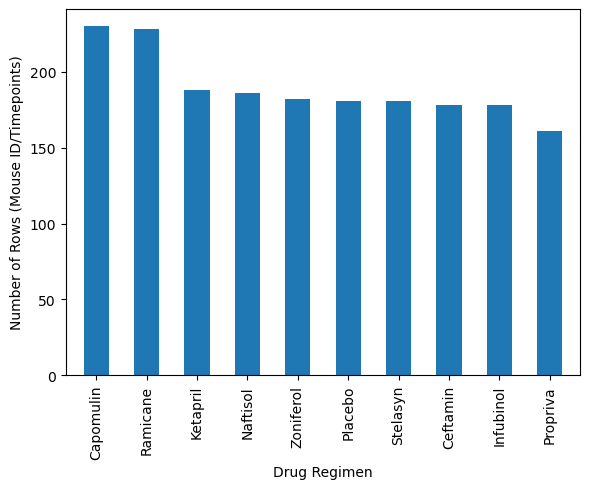

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by "Drug Regimen" and count by "Mouse ID"
regimen_counts = df.groupby("Drug Regimen")["Mouse ID"].count()

# Sort the data in ascending order
regimen_counts = regimen_counts.sort_values(ascending=False)

# Create a bar plot using Pandas plotting
axis =regimen_counts.plot(kind="bar", figsize=(6, 5), width=0.5)

# Set x-axis limits for space on the left and right
axis.set_xlim(-0.6, len(regimen_counts) - 0.4)

# Set plot labels and title
axis.set_xlabel("Drug Regimen")
axis.set_ylabel("Number of Rows (Mouse ID/Timepoints)")

# Show the plot
plt.tight_layout()
plt.show()

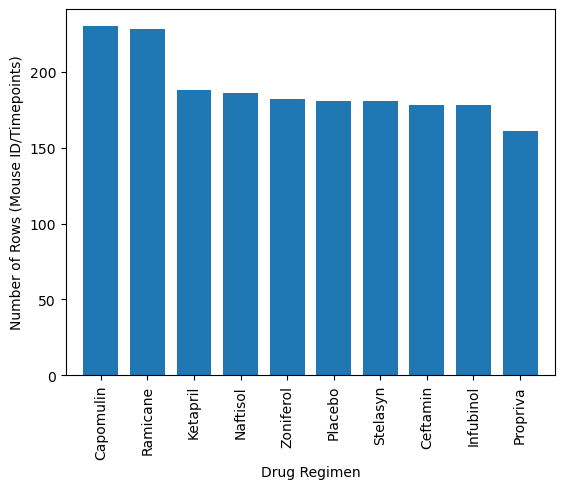

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by "Drug Regimen" and count by "Mouse ID"
regimen_counts = df.groupby("Drug Regimen")["Mouse ID"].count()

# Sort the data in ascending order
regimen_counts = regimen_counts.sort_values(ascending=False)

# Create a bar plot using Matplotlib"s pyplot
plt.figure(figsize=(5.75, 5))
plt.bar(regimen_counts.index, regimen_counts, width=0.75)

# Set x-axis limits for space on the left and right
plt.xlim(left=-0.75, right=len(regimen_counts) - 0.25)

# Set plot labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

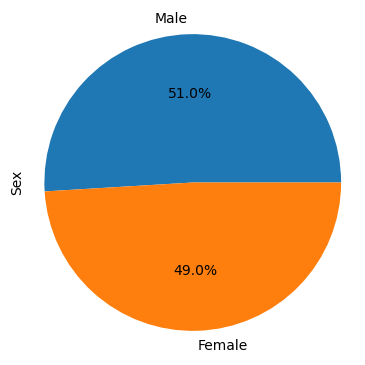

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the data by "Sex"
sex_count = clean_data["Sex"].value_counts()

# Create a pie plot using Pandas plotting
sex_count.plot(kind="pie", autopct="%1.1f%%", startangle=0, figsize=(3.75, 3.75),)

# Set y-label
plt.ylabel("Sex")

# Show the plot
plt.tight_layout()

# Equal aspect ratio to drawn as a circle
plt.axis("equal")  
plt.show()

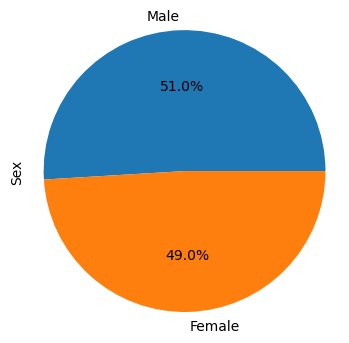

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# sex_counts by column Sex
sex_count = clean_data["Sex"].value_counts()

# Create a pie plot using Matplotlib"s pyplot
plt.figure(figsize=(4, 4))
plt.pie(sex_count, labels=sex_count.index, autopct="%1.1f%%", startangle=0)

# Equal aspect ratio to drawn as a circle
plt.axis("equal")

# Set y-label
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_df = clean_data[clean_data["Drug Regimen"].isin(treatment_regimens)]
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_df, on=["Mouse ID", "Timepoint"], how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = treatment_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    # Filter the DataFrame to get tumor volume data for the current treatment
    subset_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    # Append the subset data to the list
    tumor_vol_data.append(subset_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create a empty dictionary
potential_outliers = {} 

# Locate the rows contain mice on each drug and get the tumor volumes
for treatment, tumor_volumes in zip(treatments, tumor_vol_data):
    # Calculate the quartiles
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    # Calculate the IQR
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    # Identify potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Store potential outliers
    potential_outliers[treatment] = outliers
    
# Print potential outliers for each treatment
for treatment, outliers in potential_outliers.items():
    if outliers.empty:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{treatment}'s potential outliers:{outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


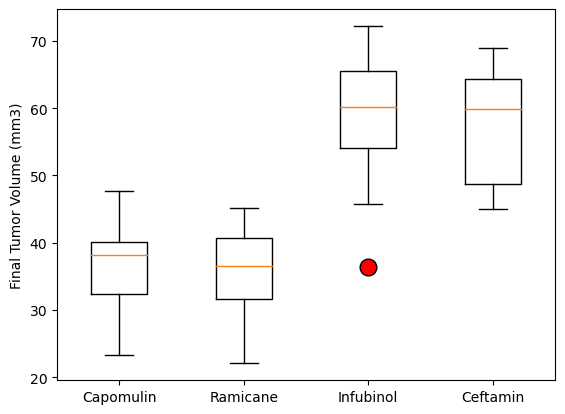

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = treatments
plt.figure(figsize=(5.75, 4.25))
plt.boxplot(tumor_vol_data, labels=labels, flierprops=dict(marker="o", markersize=12, markerfacecolor="red", markeredgecolor="black"))
plt.ylabel("Final Tumor Volume (mm3)")
plt.tight_layout()

## Line and Scatter Plots

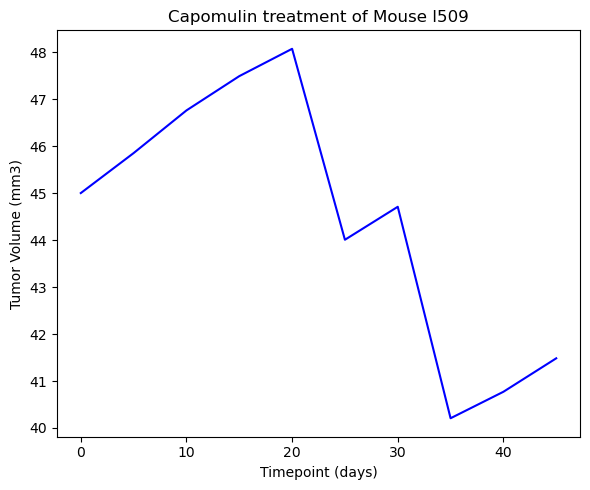

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data 
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Choose "l509" mouse from data 
mouse_id = "l509"  

# Filter data for the selected mouse
select_mouse = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Create a line plot 
plt.figure(figsize=(6, 5)) 
plt.plot(select_mouse["Timepoint"], select_mouse["Tumor Volume (mm3)"], linestyle='-', color='b')

# Set plot labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of Mouse {mouse_id}")

# Show the plot
plt.tight_layout()
plt.show()

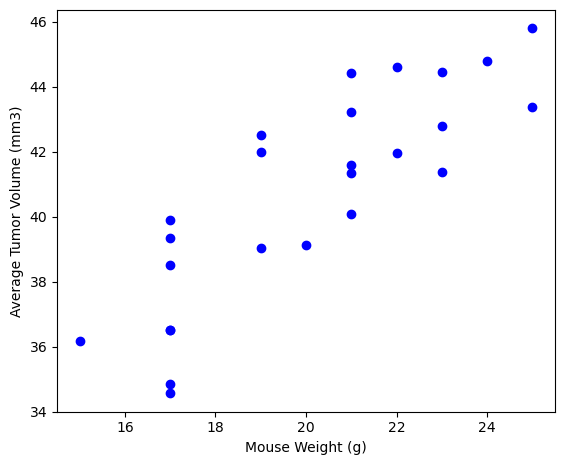

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.figure(figsize=(5.75, 4.75))
plt.scatter(weight, average_tumor_volume, marker="o", color="b")

# Set plot labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


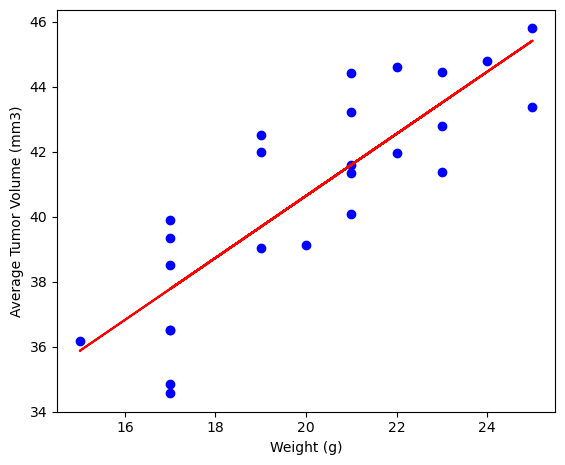

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient
stats = st.pearsonr(weight, average_tumor_volume)
coef = stats[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_value = weight * slope + intercept

# Create a scatter plot
plt.figure(figsize=(5.75, 4.75))
plt.scatter(weight, average_tumor_volume, marker="o", color="b")

# Set plot labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight, regress_value, "r-")

# Show the plot
print(f"The correlation between mouse weight and the average tumor volume is: {round(coef, 2)}")
plt.tight_layout()
plt.show()